In [1]:
from data_structure import dataIndexing


In [2]:
data_dir = '../data/ml-latest-small/ratings.csv'
data_indexed = dataIndexing(data_dir, 2)

In [3]:
data_indexed.get_data()

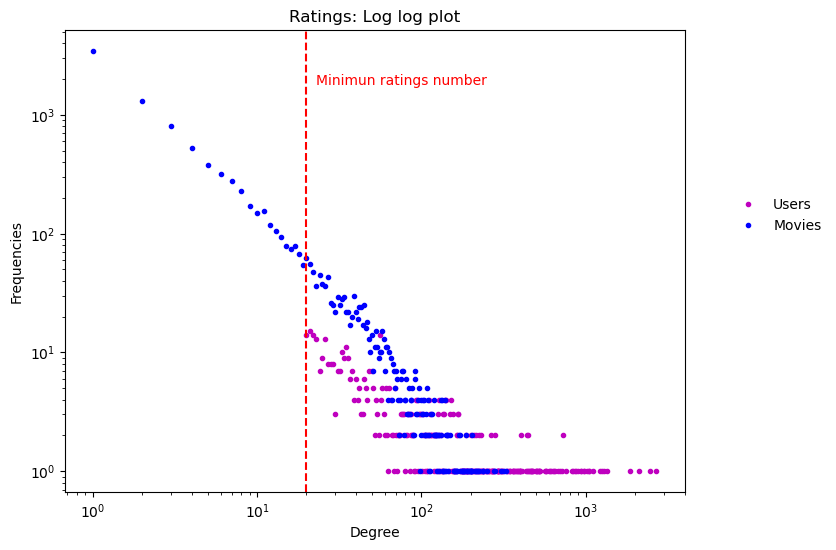

In [4]:
data_indexed.plot_power_law()

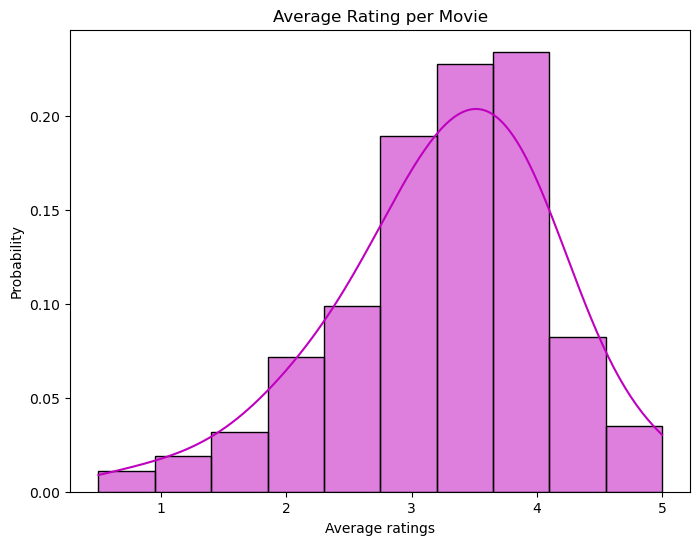

In [5]:
data_indexed.plot_average_rating_hist()

## User biases and items biases

In [6]:
user_biases, item_biases ,losses, rmse= data_indexed.alternating_least_square_biases(lambd=0.5, gamma=0.5, iterations = 5)

Iteration0: loss = 18993.011640543264; RMSE = 0.6519023966026453


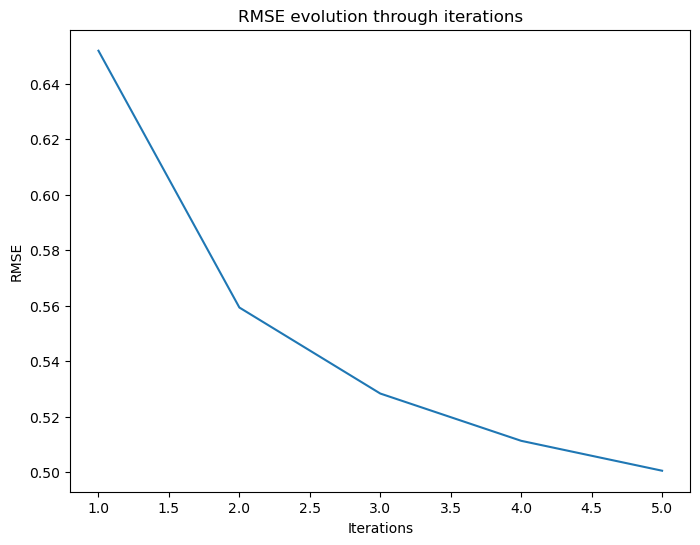

In [7]:
data_indexed.line_plot(rmse, xaxis = "Iterations", yaxis = "RMSE", title="RMSE evolution through iterations")

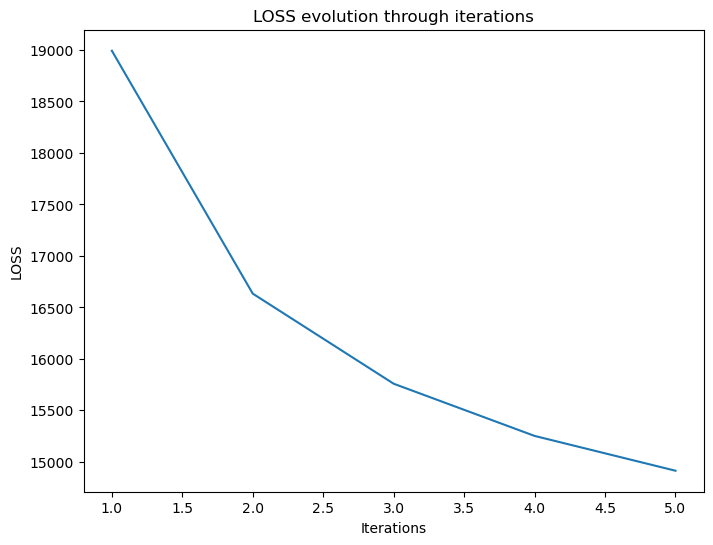

In [8]:
data_indexed.line_plot(losses, xaxis = "Iterations", yaxis = "LOSS", title="LOSS evolution through iterations")


In [13]:
data_dir25 = '../data/ml-25m/ratings.csv'
data_indexed25 = dataIndexing(data_dir25, 2)

In [23]:
data_indexed25.get_data()

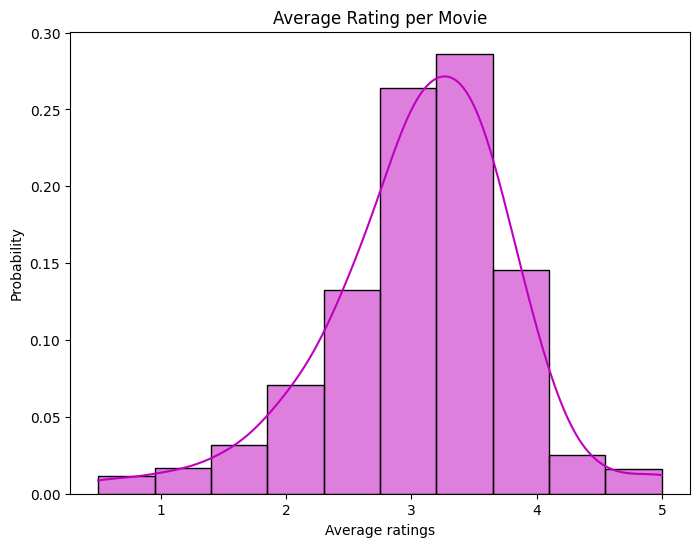

In [24]:
data_indexed25.plot_average_rating_hist()

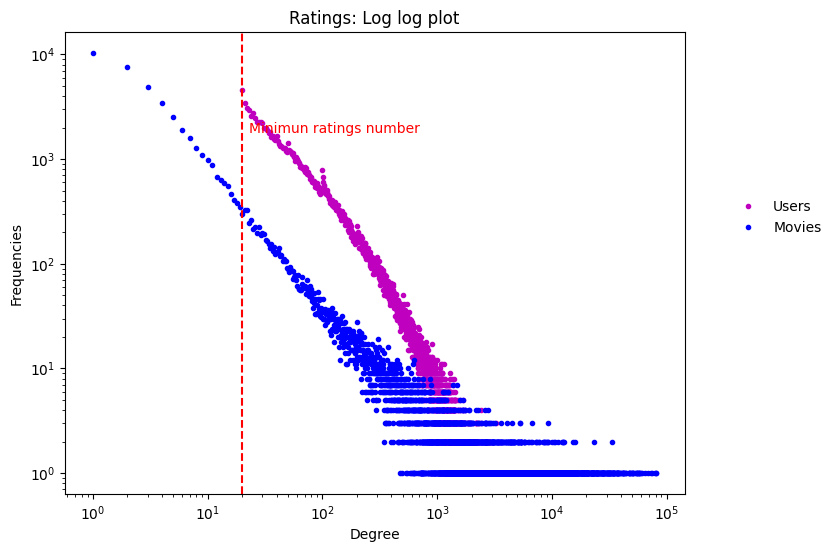

In [25]:
data_indexed25.plot_power_law()

In [26]:
user_biases, item_biases ,losses, rmse= data_indexed25.alternating_least_square_biases(lambd=0.5, gamma=0.5, iterations = 100)

KeyboardInterrupt: 

In [3]:
import pandas as pd

In [4]:
path = '../data/ml-latest-small/ratings.csv'
df = pd.read_csv(path)

In [6]:
df.rating.values

array([4., 4., 4., ..., 5., 5., 3.])

In [9]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
from scipy.sparse import csr_matrix

In [12]:
len(df.rating.values)

100836

In [13]:
len(df.userId.unique())*len(df.movieId.unique())

5931640

In [17]:
ratings = csr_matrix(
    (df.rating.values, (df.userId.values, df.movieId.values)), 
    shape=(len(df.userId.unique())+1, len(df.movieId.unique())+183885+1)
).toarray()

In [19]:
ratings.shape

(611, 193610)

In [15]:
193609-9724

183885

# Train test split

In [10]:
data_indexed.train_test_split()

In [11]:
data_indexed.data_by_movie_test

[[(1, 4.0),
  (5, 4.0),
  (7, 4.5),
  (),
  (15, 2.5),
  (),
  (17, 4.5),
  (),
  (18, 3.5),
  (),
  (19, 4.0),
  (),
  (21, 3.5),
  (),
  (27, 3.0),
  (31, 5.0),
  (32, 3.0),
  (),
  (33, 3.0),
  (40, 5.0),
  (43, 5.0),
  (),
  (44, 3.0),
  (45, 4.0),
  (),
  (46, 5.0),
  (50, 3.0),
  (54, 3.0),
  (),
  (57, 5.0),
  (),
  (63, 5.0),
  (64, 4.0),
  (66, 4.0),
  (68, 2.5),
  (71, 5.0),
  (73, 4.5),
  (),
  (76, 0.5),
  (78, 4.0),
  (82, 2.5),
  (86, 4.0),
  (89, 3.0),
  (),
  (90, 3.0),
  (91, 4.0),
  (),
  (93, 3.0),
  (96, 5.0),
  (),
  (98, 4.5),
  (),
  (103, 4.0),
  (),
  (107, 4.0),
  (112, 3.0),
  (119, 3.5),
  (),
  (121, 4.0),
  (),
  (124, 4.0),
  (),
  (130, 3.0),
  (132, 2.0),
  (134, 3.0),
  (135, 4.0),
  (137, 4.0),
  (140, 3.0),
  (),
  (141, 4.0),
  (),
  (144, 3.5),
  (145, 5.0),
  (),
  (151, 5.0),
  (),
  (153, 2.0),
  (),
  (155, 3.0),
  (),
  (156, 4.0),
  (),
  (159, 4.5),
  (),
  (160, 4.0),
  (161, 4.0),
  (166, 5.0),
  (),
  (167, 3.5),
  (),
  (169, 4.5),
  (),

In [9]:
len(data_indexed.data_by_user_train)

610

In [10]:
len(data_indexed.data_by_user_test)

610

In [12]:
data_indexed.data_by_movie_train

[[(),
  (),
  (),
  (15, 2.5),
  (),
  (17, 4.5),
  (),
  (18, 3.5),
  (),
  (19, 4.0),
  (),
  (21, 3.5),
  (),
  (27, 3.0),
  (),
  (),
  (),
  (33, 3.0),
  (),
  (),
  (),
  (44, 3.0),
  (),
  (),
  (46, 5.0),
  (),
  (),
  (),
  (57, 5.0),
  (),
  (63, 5.0),
  (),
  (),
  (),
  (),
  (),
  (),
  (76, 0.5),
  (),
  (),
  (),
  (),
  (),
  (90, 3.0),
  (),
  (),
  (93, 3.0),
  (),
  (),
  (98, 4.5),
  (),
  (103, 4.0),
  (),
  (107, 4.0),
  (),
  (),
  (),
  (121, 4.0),
  (),
  (124, 4.0),
  (),
  (130, 3.0),
  (),
  (),
  (),
  (),
  (),
  (),
  (141, 4.0),
  (),
  (144, 3.5),
  (),
  (),
  (151, 5.0),
  (),
  (153, 2.0),
  (),
  (155, 3.0),
  (),
  (156, 4.0),
  (),
  (159, 4.5),
  (),
  (160, 4.0),
  (),
  (),
  (),
  (167, 3.5),
  (),
  (169, 4.5),
  (),
  (171, 5.0),
  (),
  (),
  (),
  (179, 4.0),
  (),
  (182, 4.0),
  (),
  (185, 4.0),
  (),
  (),
  (191, 4.0),
  (),
  (),
  (200, 3.5),
  (),
  (),
  (202, 4.0),
  (),
  (206, 5.0),
  (),
  (213, 3.5),
  (),
  (),
  (216, 3.0),